<a href="https://colab.research.google.com/github/devansh391k/22BDS0064/blob/main/22BDS0064.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DEVANSH SHUKLA (22BDS0064)**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# 1. Load the dataset
df = pd.read_csv("Medicaid1986.csv")

# DATA EXPLORATION
# 2. Print the entire dataset
print(df)


     rownames  visits  exposure  children  age  income  health1  health2  \
0           1       0       100         1   24  14.500    0.495   -0.854   
1           2       1        90         3   19   6.000    0.520   -0.969   
2           3       0       106         4   17   8.377   -1.227    0.317   
3           4       0       114         2   29   6.000   -1.524    0.457   
4           5      11       115         1   26   8.500    0.173   -0.599   
..        ...     ...       ...       ...  ...     ...      ...      ...   
991       992       0       106         0   65   8.500   -2.264    0.347   
992       993       1       107         0   90   9.660    1.532    0.455   
993       994      10       116         1   70   6.000    2.660   -0.723   
994       995       3       118         0   73   6.000    0.813    0.056   
995       996       0       115         2   71  10.444   -2.113    0.236   

     access married  gender ethnicity  school enroll program  
0      0.50      no  fem

In [2]:
# 3. Display dataset structure and attributes
print("Dataset Dimensions:", df.shape)
print("Attribute Names:", df.columns.tolist())
print("Dataset Structure:")
print(df.info())

Dataset Dimensions: (996, 15)
Attribute Names: ['rownames', 'visits', 'exposure', 'children', 'age', 'income', 'health1', 'health2', 'access', 'married', 'gender', 'ethnicity', 'school', 'enroll', 'program']
Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rownames   996 non-null    int64  
 1   visits     996 non-null    int64  
 2   exposure   996 non-null    int64  
 3   children   996 non-null    int64  
 4   age        996 non-null    int64  
 5   income     996 non-null    float64
 6   health1    996 non-null    float64
 7   health2    996 non-null    float64
 8   access     996 non-null    float64
 9   married    996 non-null    object 
 10  gender     996 non-null    object 
 11  ethnicity  996 non-null    object 
 12  school     996 non-null    int64  
 13  enroll     996 non-null    object 
 14  program    996 non-null

In [3]:
# 4. Display first and last 3 rows
print("First 3 rows:")
print(df.head(3))
print("Last 3 rows:")
print(df.tail(3))

First 3 rows:
   rownames  visits  exposure  children  age  income  health1  health2  \
0         1       0       100         1   24  14.500    0.495   -0.854   
1         2       1        90         3   19   6.000    0.520   -0.969   
2         3       0       106         4   17   8.377   -1.227    0.317   

   access married  gender ethnicity  school enroll program  
0    0.50      no  female      cauc      13    yes    afdc  
1    0.17      no  female      cauc      11    yes    afdc  
2    0.42      no  female      cauc      12    yes    afdc  
Last 3 rows:
     rownames  visits  exposure  children  age  income  health1  health2  \
993       994      10       116         1   70   6.000    2.660   -0.723   
994       995       3       118         0   73   6.000    0.813    0.056   
995       996       0       115         2   71  10.444   -2.113    0.236   

     access married  gender ethnicity  school enroll program  
993    0.17      no  female      cauc       8     no     ssi  
9

In [4]:
# HANDLING MISSING DATA
# 5. Check if there are any missing values
print("Are there any NA values?", df.isna().any().any())

Are there any NA values? False


In [5]:
# 6. Summary of missing values
print("Missing Values Summary:")
print(df.isna().sum())

Missing Values Summary:
rownames     0
visits       0
exposure     0
children     0
age          0
income       0
health1      0
health2      0
access       0
married      0
gender       0
ethnicity    0
school       0
enroll       0
program      0
dtype: int64


In [6]:
# 7. Total missing values per column (proportion)
print("Proportion of Missing Values:")
print(df.isna().mean())

Proportion of Missing Values:
rownames     0.0
visits       0.0
exposure     0.0
children     0.0
age          0.0
income       0.0
health1      0.0
health2      0.0
access       0.0
married      0.0
gender       0.0
ethnicity    0.0
school       0.0
enroll       0.0
program      0.0
dtype: float64


In [7]:
# 9. Count the total number of complete values in alcohol and drugs
if "exposure" in df.columns and "age" in df.columns:
    print("Complete values in exposure:", df["exposure"].notna().sum())
    print("Complete values in age:", df["age"].notna().sum())

Complete values in exposure: 996
Complete values in age: 996


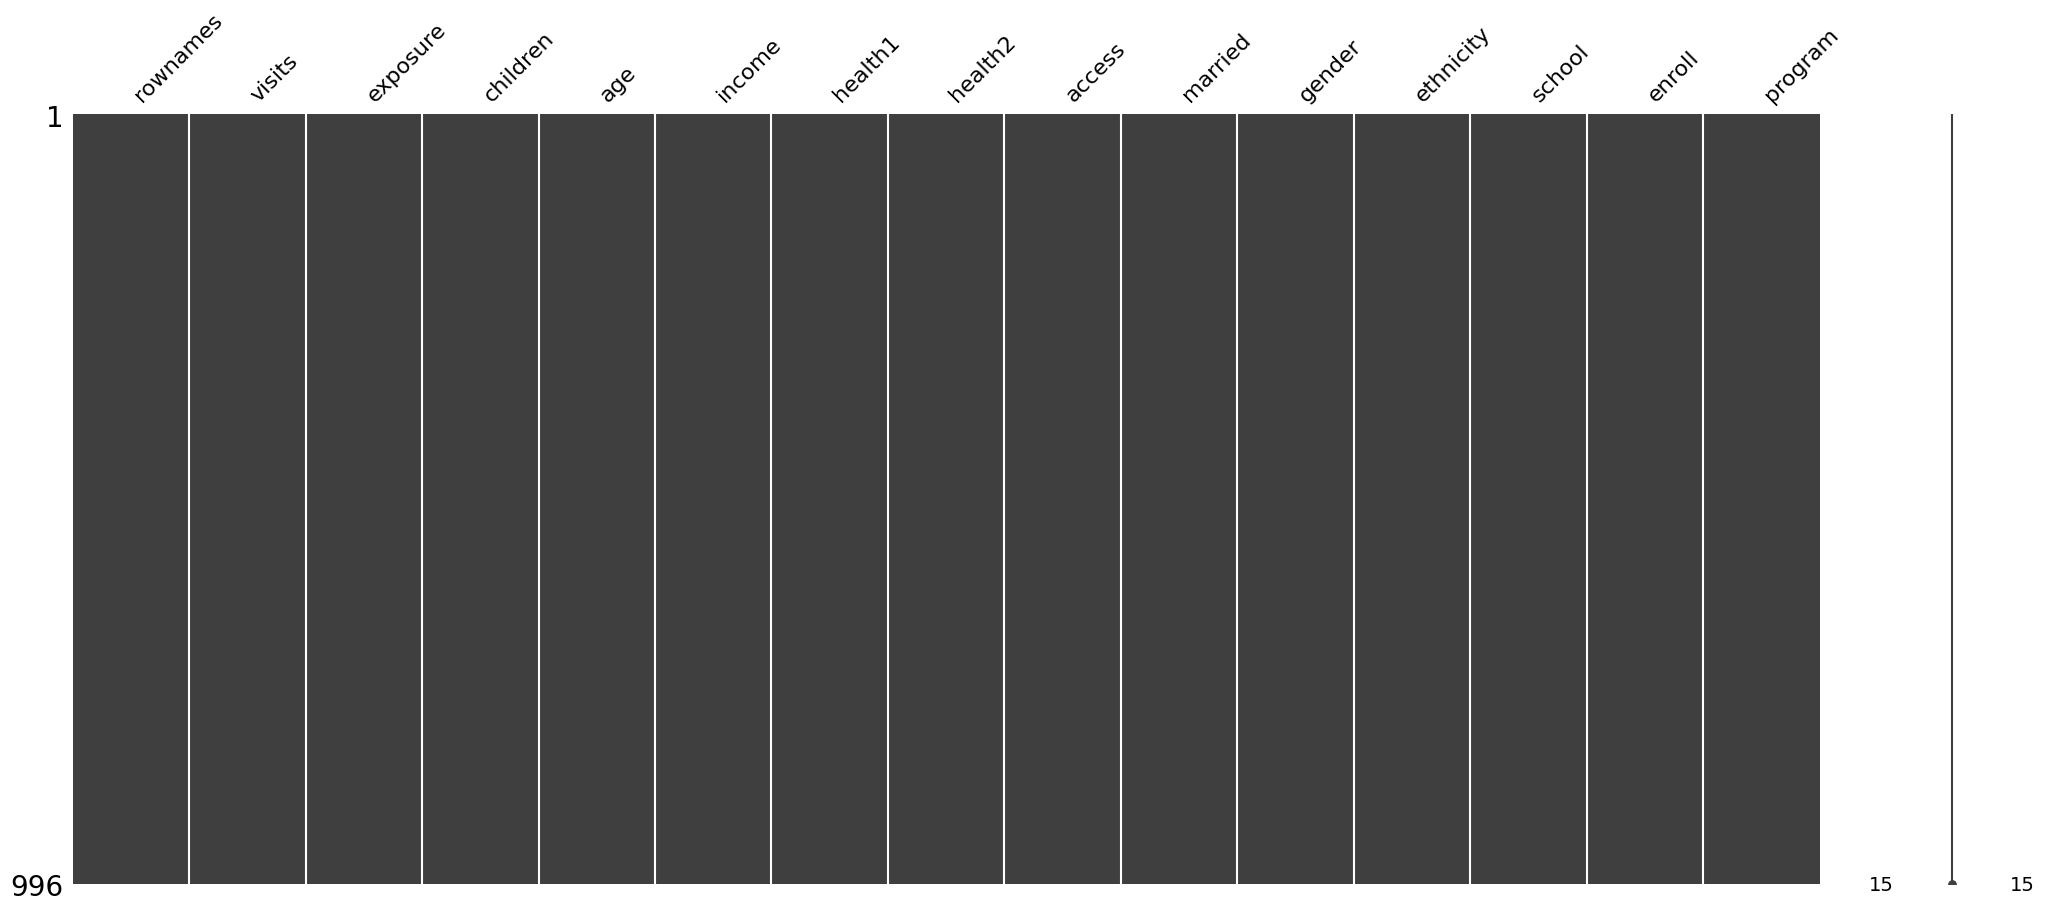

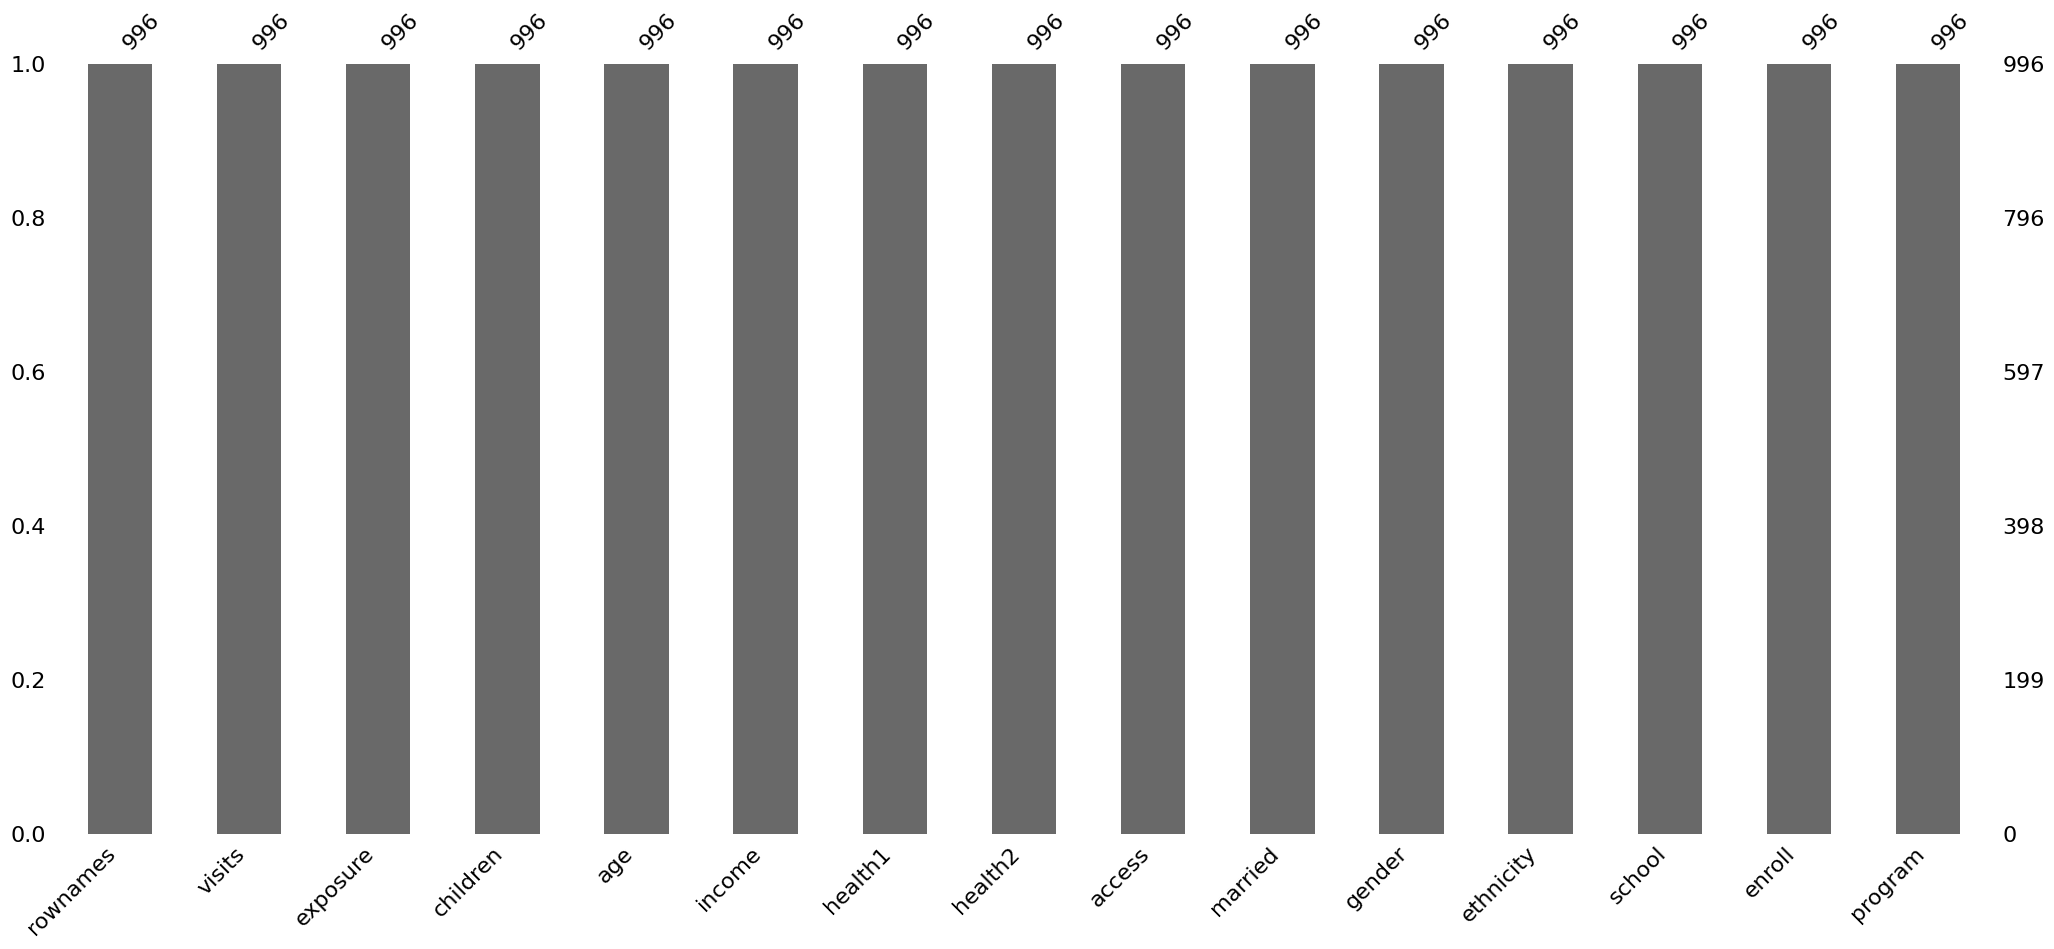

In [8]:
# 10. Missing values visualization
msno.matrix(df)
plt.show()
msno.bar(df)
plt.show()

In [9]:
# 11. Row-wise deletion of missing values
print("Dataset Dimensions before removing missing values:", df.shape)
df_cleaned = df.dropna()
print("Dataset after removing missing values:", df_cleaned.shape)


Dataset Dimensions before removing missing values: (996, 15)
Dataset after removing missing values: (996, 15)


In [10]:
# DATA CLEANING
# 12. Delete a column by index
df.drop(df.columns[2], axis=1, inplace=True)

In [11]:
#13. Find non-numeric values
non_numeric_counts = df.apply(lambda col: col.map(lambda x: not str(x).replace('.', '', 1).isdigit()).sum())
print("Non-numeric values per column:")
print(non_numeric_counts)

Non-numeric values per column:
rownames       0
visits         0
children       0
age            0
income         0
health1      566
health2      499
access         0
married      996
gender       996
ethnicity    996
school         0
enroll       996
program      996
dtype: int64


In [12]:
# 14. Replace missing values in '' column with mean and convert to numeric
if "exposure" in df.columns:
    df["exposure"] = pd.to_numeric(df["exposure"], errors='coerce')
    df["exposure"].fillna(df["exposure"].mean(), inplace=True)

In [13]:
# STATISTICAL ANALYSIS
# 15. Statistical summary
print("Statistical Summary:")
print(df.describe())

Statistical Summary:
         rownames      visits    children         age      income     health1  \
count  996.000000  996.000000  996.000000  996.000000  996.000000  996.000000   
mean   498.500000    1.930723    1.314257   55.205823    8.191302   -0.000013   
std    287.664735    3.354472    1.509314   24.961373    3.630549    1.436934   
min      1.000000    0.000000    0.000000   16.000000    0.500000   -2.264000   
25%    249.750000    0.000000    0.000000   29.000000    6.000000   -1.151250   
50%    498.500000    1.000000    1.000000   66.000000    7.990000   -0.316500   
75%    747.250000    3.000000    2.000000   78.000000    8.500000    0.858000   
max    996.000000   50.000000    9.000000  105.000000   17.500000    7.217000   

          health2      access      school  
count  996.000000  996.000000  996.000000  
mean     0.000020    0.398102    9.029116  
std      0.740226    0.184439    4.353957  
min     -2.177000    0.000000    0.000000  
25%     -0.472000    0.297500

In [14]:
# 16. Central tendency measures
print("Mean:", df.mean(numeric_only=True))
print("Median:", df.median(numeric_only=True))
print("Mode:", df.mode().iloc[0])

Mean: rownames    498.500000
visits        1.930723
children      1.314257
age          55.205823
income        8.191302
health1      -0.000013
health2       0.000020
access        0.398102
school        9.029116
dtype: float64
Median: rownames    498.5000
visits        1.0000
children      1.0000
age          66.0000
income        7.9900
health1      -0.3165
health2      -0.0090
access        0.4200
school       10.0000
dtype: float64
Mode: rownames          1
visits          0.0
children        0.0
age            24.0
income          6.0
health1      -1.524
health2       0.457
access         0.33
married          no
gender       female
ethnicity      cauc
school         12.0
enroll           no
program         ssi
Name: 0, dtype: object


In [15]:
print("Correlation Matrix:")
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)


Correlation Matrix:
          rownames    visits  children       age    income   health1  \
rownames  1.000000  0.083851 -0.499293  0.814434  0.026087  0.017332   
visits    0.083851  1.000000 -0.112417  0.095161  0.001245  0.268702   
children -0.499293 -0.112417  1.000000 -0.580759  0.245881 -0.018190   
age       0.814434  0.095161 -0.580759  1.000000  0.032399  0.081452   
income    0.026087  0.001245  0.245881  0.032399  1.000000 -0.001627   
health1   0.017332  0.268702 -0.018190  0.081452 -0.001627  1.000000   
health2  -0.027534  0.001618 -0.021553  0.053305  0.021525 -0.000013   
access   -0.013392  0.029433 -0.080460  0.085041  0.002390 -0.078797   
school   -0.358652  0.009566  0.036229 -0.368781 -0.118488 -0.012012   

           health2    access    school  
rownames -0.027534 -0.013392 -0.358652  
visits    0.001618  0.029433  0.009566  
children -0.021553 -0.080460  0.036229  
age       0.053305  0.085041 -0.368781  
income    0.021525  0.002390 -0.118488  
health1  -0.0

Correlation Matrix:
          rownames    visits  children       age    income   health1  \
rownames  1.000000  0.083851 -0.499293  0.814434  0.026087  0.017332   
visits    0.083851  1.000000 -0.112417  0.095161  0.001245  0.268702   
children -0.499293 -0.112417  1.000000 -0.580759  0.245881 -0.018190   
age       0.814434  0.095161 -0.580759  1.000000  0.032399  0.081452   
income    0.026087  0.001245  0.245881  0.032399  1.000000 -0.001627   
health1   0.017332  0.268702 -0.018190  0.081452 -0.001627  1.000000   
health2  -0.027534  0.001618 -0.021553  0.053305  0.021525 -0.000013   
access   -0.013392  0.029433 -0.080460  0.085041  0.002390 -0.078797   
school   -0.358652  0.009566  0.036229 -0.368781 -0.118488 -0.012012   

           health2    access    school  
rownames -0.027534 -0.013392 -0.358652  
visits    0.001618  0.029433  0.009566  
children -0.021553 -0.080460  0.036229  
age       0.053305  0.085041 -0.368781  
income    0.021525  0.002390 -0.118488  
health1  -0.0

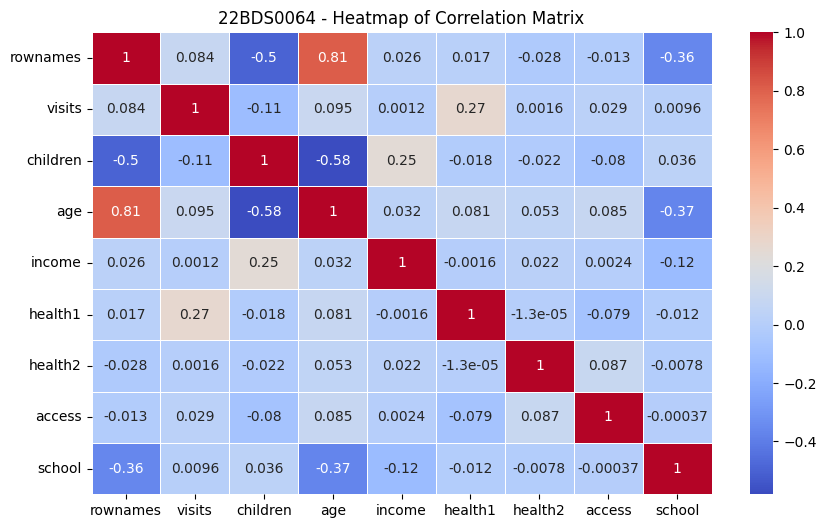

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only numeric columns for correlation
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation
correlation_matrix = df_numeric.corr()

# #20 - Correlation Matrix
print("Correlation Matrix:")
print(correlation_matrix)

# #21 - Display Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("22BDS0064 - Heatmap of Correlation Matrix")
plt.show()


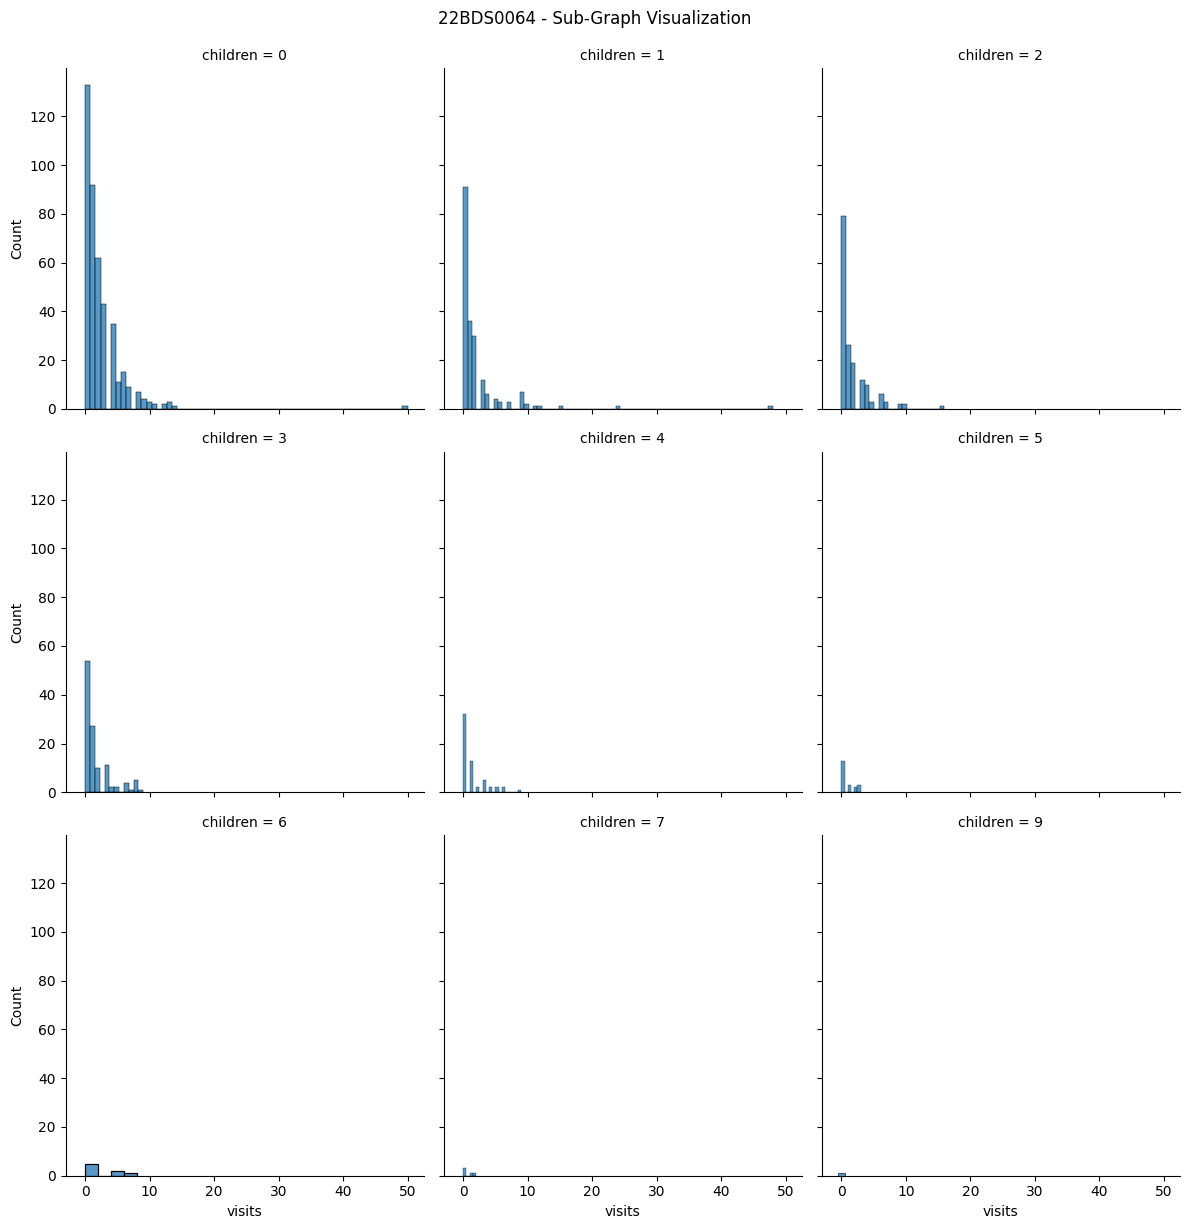

In [17]:
# DATA VISUALIZATION

# 22. Sub-Graph Visualization
if df.shape[1] > 2:
    g = sns.FacetGrid(df, col=df.columns[2], col_wrap=3, height=4)
    g.map_dataframe(sns.histplot, df.columns[1])
    plt.suptitle("22BDS0064 - Sub-Graph Visualization", y=1.02)
    plt.show()

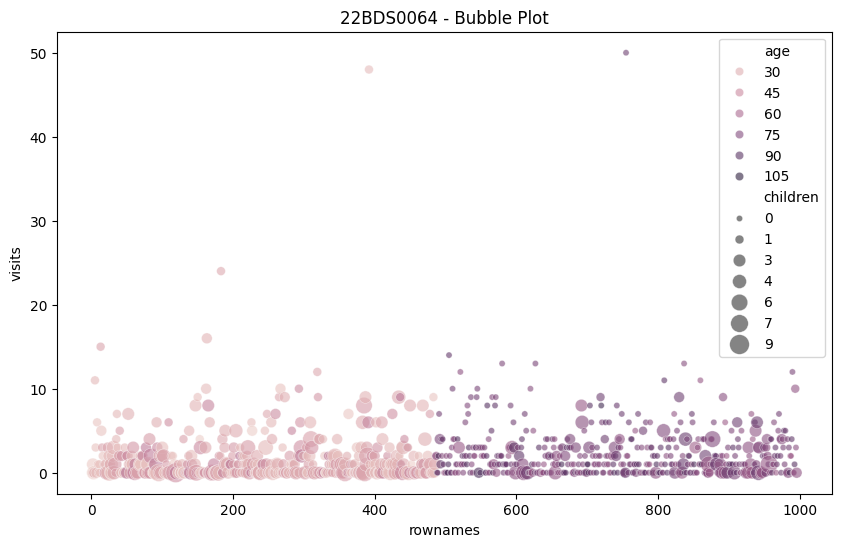

In [18]:
# 23. Bubble Plot
if df.shape[1] > 3:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], size=df.iloc[:, 2], hue=df.iloc[:, 3], sizes=(20, 200), alpha=0.6)
    plt.title("22BDS0064 - Bubble Plot")
    plt.legend()
    plt.show()

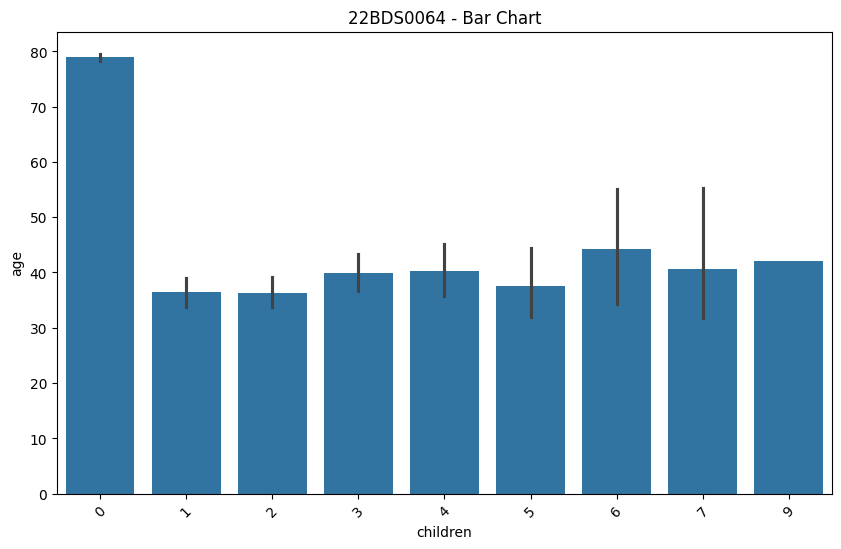

In [19]:
# 24. Bar Chart
if df.shape[1] > 1:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=df.columns[2], y=df.iloc[:, 3], data=df)
    plt.title("22BDS0064 - Bar Chart")
    plt.xticks(rotation=45)
    plt.show()

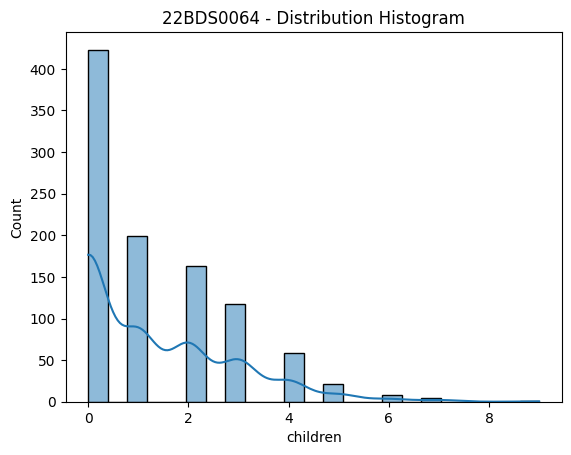

In [20]:
# 25. Univariate Analysis
sns.histplot(df.select_dtypes(include=[np.number]).iloc[:, 2], kde=True)
plt.title("22BDS0064 - Distribution Histogram")
plt.show()

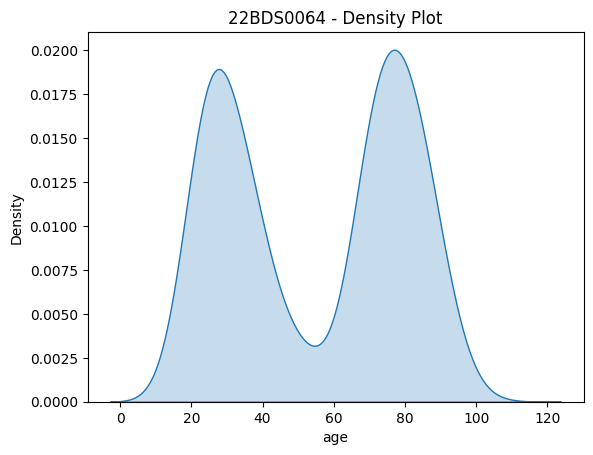

In [21]:
#26  Density Plot
sns.kdeplot(df.select_dtypes(include=[np.number]).iloc[:, 3], fill=True)
plt.title("22BDS0064 - Density Plot")
plt.show()

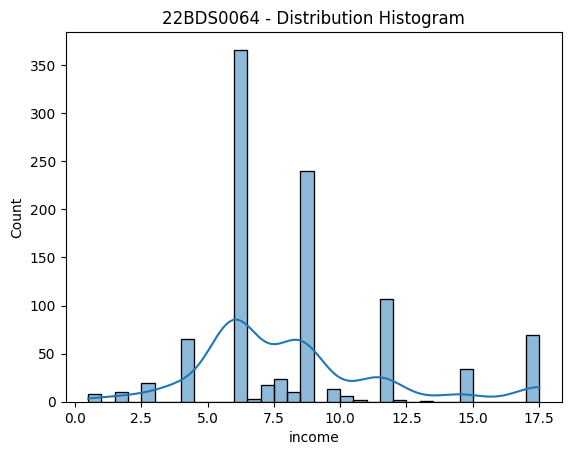

In [22]:
# distribution histogram
sns.histplot(df.select_dtypes(include=[np.number]).iloc[:, 4], kde=True)
plt.title("22BDS0064 - Distribution Histogram")
plt.show()

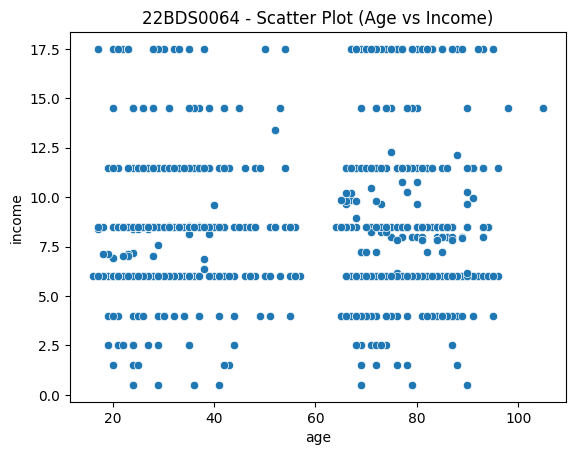

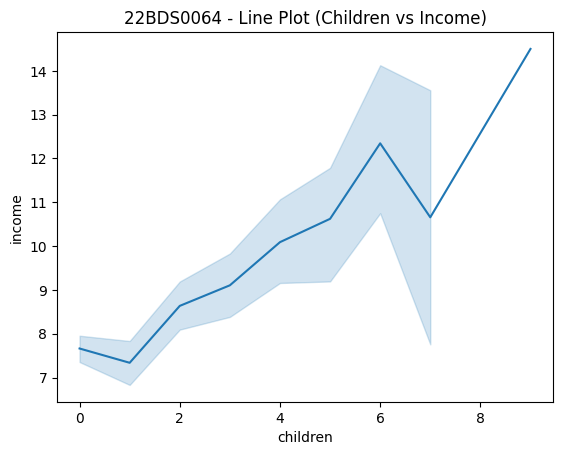

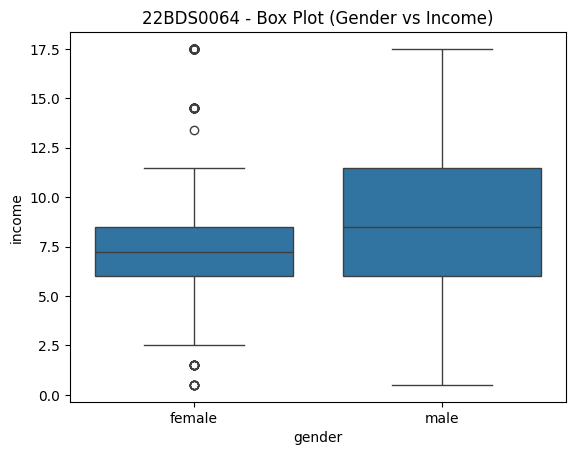

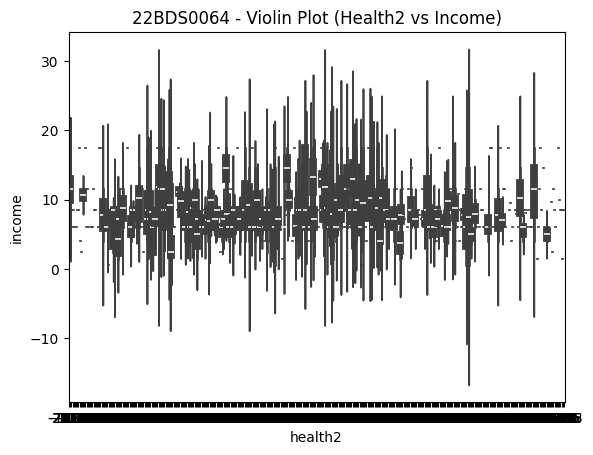

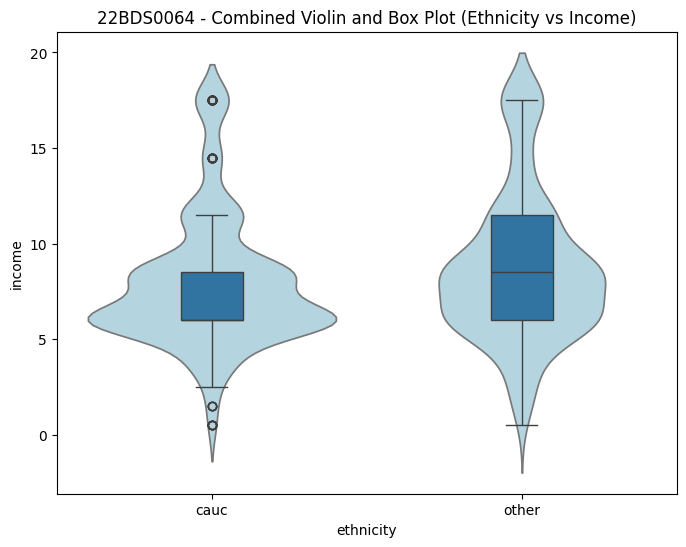

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot: age vs income
sns.scatterplot(x=df['age'], y=df['income'])
plt.title("22BDS0064 - Scatter Plot (Age vs Income)")
plt.show()

# Line Plot: children vs income
sns.lineplot(x=df['children'], y=df['income'])
plt.title("22BDS0064 - Line Plot (Children vs Income)")
plt.show()

# Box Plot: gender vs income
sns.boxplot(x=df['gender'], y=df['income'])
plt.title("22BDS0064 - Box Plot (Gender vs Income)")
plt.show()

# Violin Plot: health2 vs income
sns.violinplot(x=df['health2'], y=df['income'])
plt.title("22BDS0064 - Violin Plot (Health2 vs Income)")
plt.show()

# Combined Violin + Box Plot: ethnicity vs income
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['ethnicity'], y=df['income'], inner=None, color="lightblue")
sns.boxplot(x=df['ethnicity'], y=df['income'], width=0.2)
plt.title("22BDS0064 - Combined Violin and Box Plot (Ethnicity vs Income)")
plt.show()


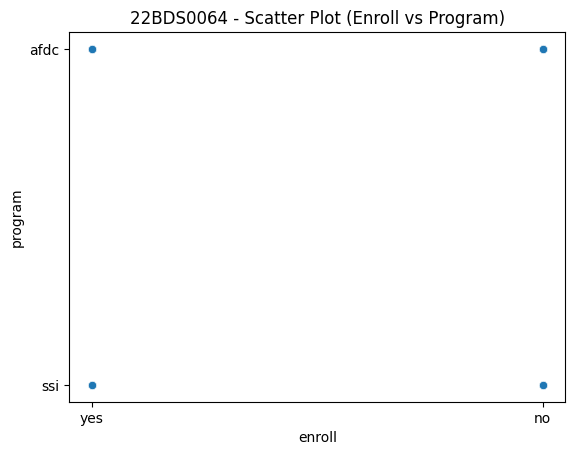

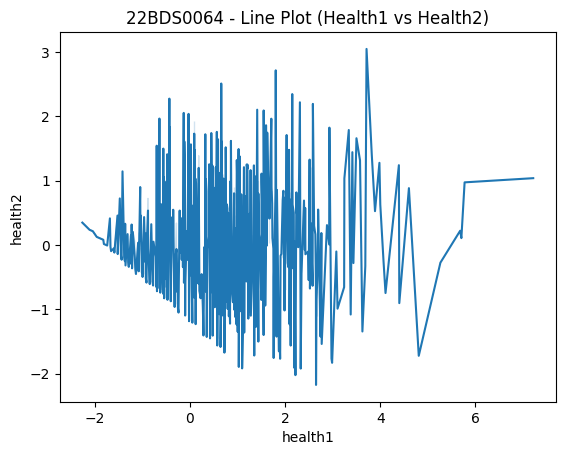

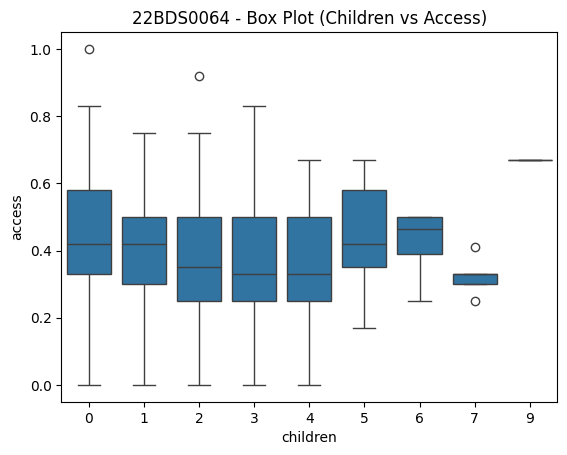

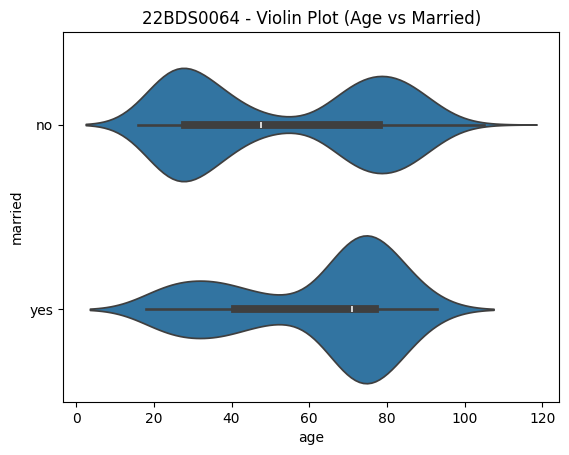

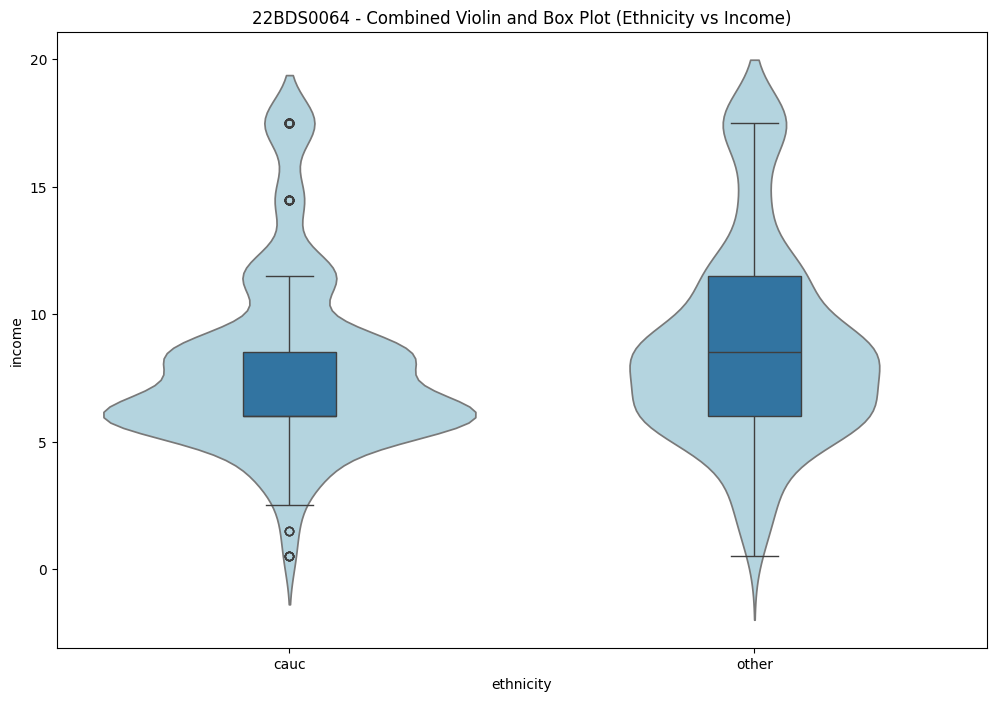

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Multivariate Analysis
if df.shape[1] > 3:
    sns.scatterplot(x=df['enroll'], y=df['program'])
    plt.title("22BDS0064 - Scatter Plot (Enroll vs Program)")
    plt.show()

    sns.lineplot(x=df['health1'], y=df['health2'])
    plt.title("22BDS0064 - Line Plot (Health1 vs Health2)")
    plt.show()

    sns.boxplot(x=df['children'], y=df['access'])
    plt.title("22BDS0064 - Box Plot (Children vs Access)")
    plt.show()

    sns.violinplot(x=df['age'], y=df['married'])
    plt.title("22BDS0064 - Violin Plot (Age vs Married)")
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.violinplot(x=df['ethnicity'], y=df['income'], inner=None, color="lightblue")
    sns.boxplot(x=df['ethnicity'], y=df['income'], width=0.2)
    plt.title("22BDS0064 - Combined Violin and Box Plot (Ethnicity vs Income)")
    plt.show()


In [25]:
# ==============================
# Phase 2 EDA Project - Template
# ==============================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 2. Load dataset
# (Upload your file to Colab first, or mount Google Drive and give path)
df = pd.read_csv("Medicaid1986.csv")   # change file name if needed

# Quick preview
print("Shape:", df.shape)
df.head()


Shape: (996, 15)


,rownames,visits,exposure,children,age,income,health1,health2,access,married,gender,ethnicity,school,enroll,program
0,1,0,100,1,24,14.500,0.495,-0.854,0.50,no,female,cauc,13,yes,afdc
1,2,1,90,3,19,6.000,0.520,-0.969,0.17,no,female,cauc,11,yes,afdc
2,3,0,106,4,17,8.377,-1.227,0.317,0.42,no,female,cauc,12,yes,afdc
3,4,0,114,2,29,6.000,-1.524,0.457,0.33,no,female,cauc,12,yes,afdc
4,5,11,115,1,26,8.500,0.173,-0.599,0.67,no,female,cauc,16,yes,afdc


In [26]:
date_like = []
time_like = []

for c in df.columns:
    if df[c].dtype == object:
        sample = df[c].dropna().astype(str).head(50).tolist()
        if any(len(s)>=10 and s[:4].isdigit() and s[4]=='-' and s[7]=='-' for s in sample):
            date_like.append(c)
        if any(':' in s for s in sample):
            time_like.append(c)

print("Possible date columns:", date_like)
print("Possible time columns:", time_like)

# Convert detected date columns to datetime
for c in date_like:
    df[c] = pd.to_datetime(df[c], errors='coerce')

df.info()


Possible date columns: []
Possible time columns: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rownames   996 non-null    int64  
 1   visits     996 non-null    int64  
 2   exposure   996 non-null    int64  
 3   children   996 non-null    int64  
 4   age        996 non-null    int64  
 5   income     996 non-null    float64
 6   health1    996 non-null    float64
 7   health2    996 non-null    float64
 8   access     996 non-null    float64
 9   married    996 non-null    object 
 10  gender     996 non-null    object 
 11  ethnicity  996 non-null    object 
 12  school     996 non-null    int64  
 13  enroll     996 non-null    object 
 14  program    996 non-null    object 
dtypes: float64(4), int64(6), object(5)
memory usage: 116.8+ KB


Numeric stats:
           count        mean         std     min        25%       50%      75%  \
rownames  996.0  498.500000  287.664735   1.000  249.75000  498.5000  747.250   
visits    996.0    1.930723    3.354472   0.000    0.00000    1.0000    3.000   
exposure  996.0  104.060241    9.144973  32.000   98.00000  104.0000  111.000   
children  996.0    1.314257    1.509314   0.000    0.00000    1.0000    2.000   
age       996.0   55.205823   24.961373  16.000   29.00000   66.0000   78.000   
income    996.0    8.191302    3.630549   0.500    6.00000    7.9900    8.500   
health1   996.0   -0.000013    1.436934  -2.264   -1.15125   -0.3165    0.858   
health2   996.0    0.000020    0.740226  -2.177   -0.47200   -0.0090    0.347   
access    996.0    0.398102    0.184439   0.000    0.29750    0.4200    0.500   
school    996.0    9.029116    4.353957   0.000    6.00000   10.0000   12.000   

              max  skewness  
rownames  996.000  0.000000  
visits     50.000  6.666302  
ex

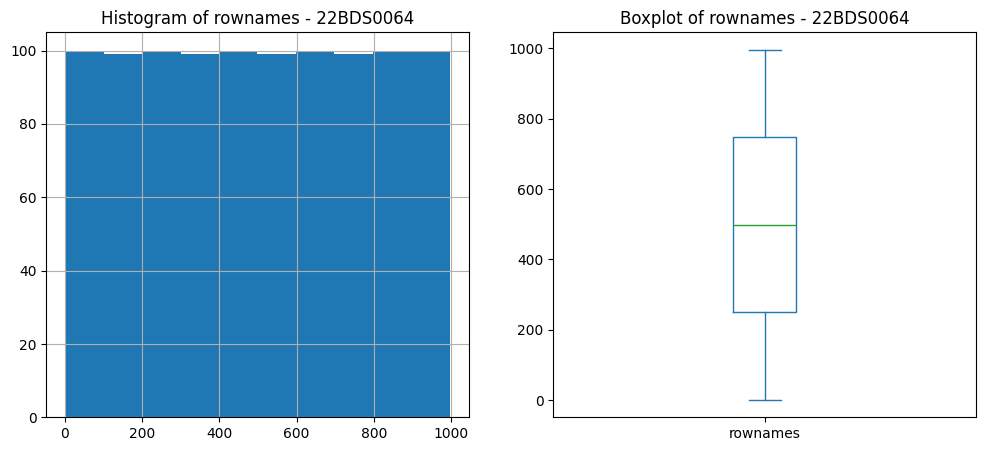

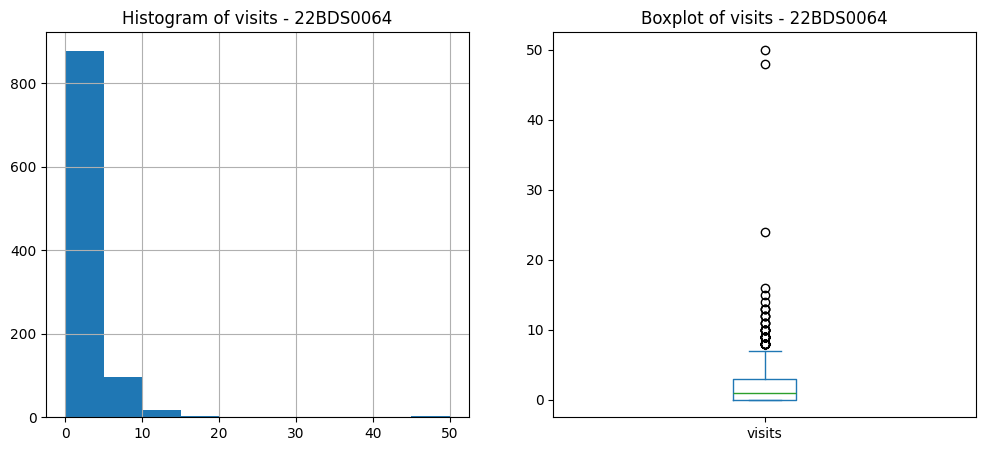

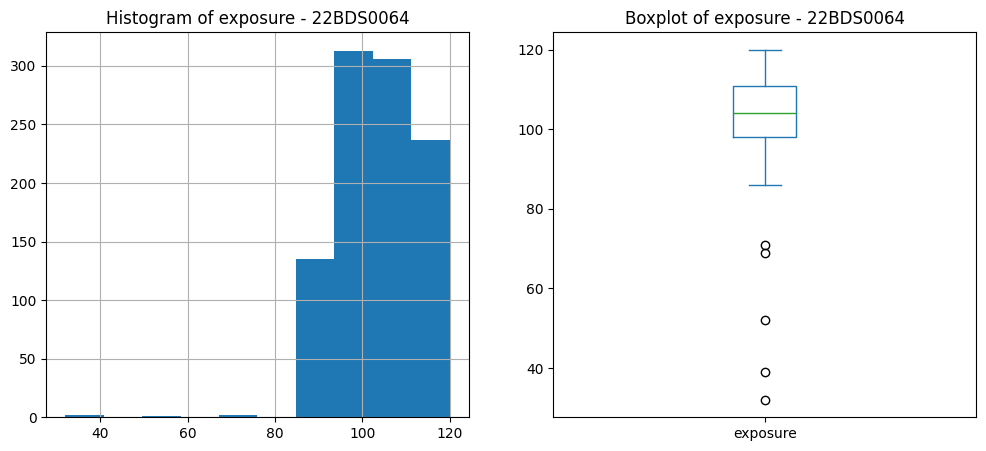

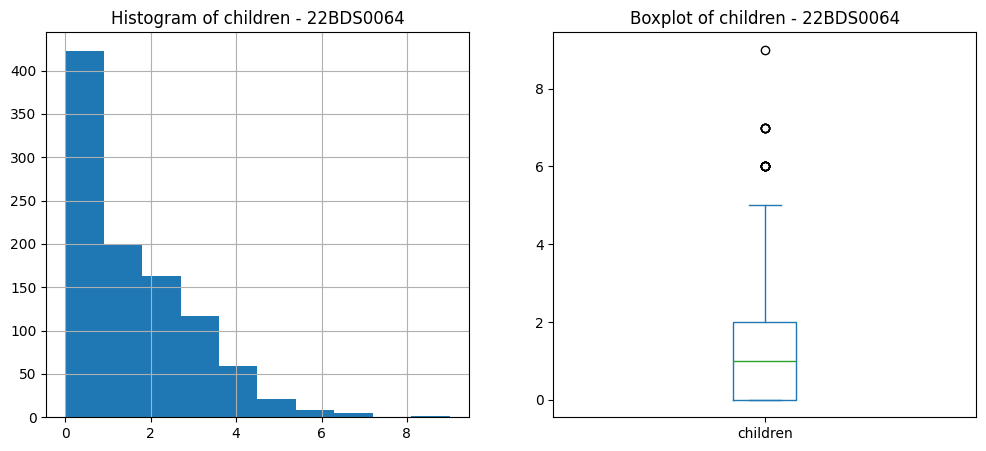

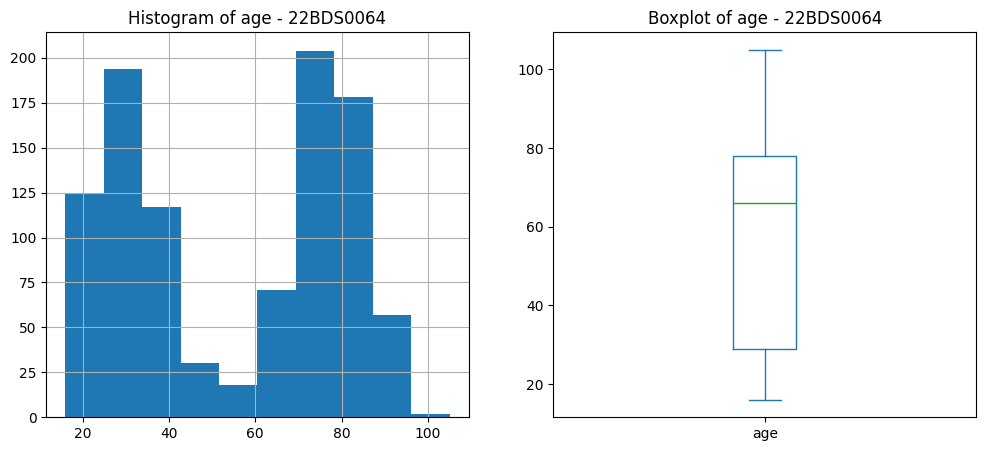

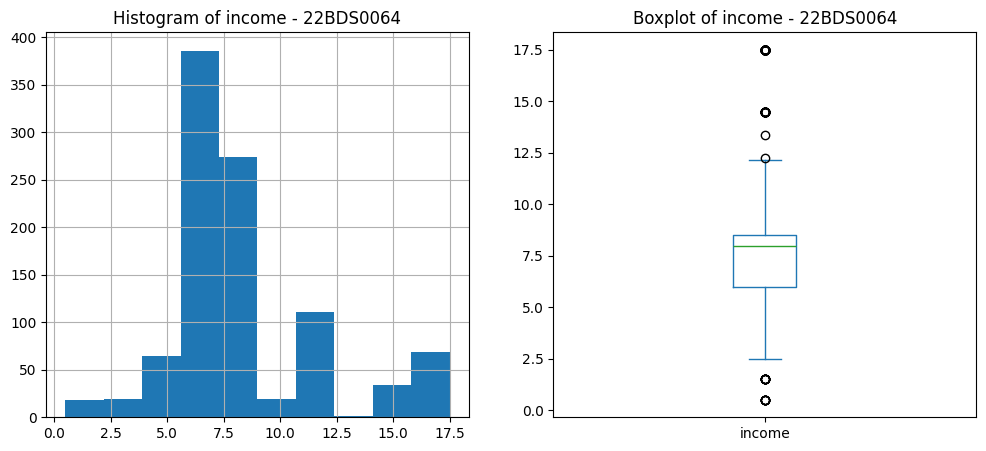

In [27]:
# Separate numeric and categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in df.columns if c not in numeric_cols]

# Numeric stats (quantiles, skewness)
num_stats = df[numeric_cols].describe().T
num_stats['skewness'] = df[numeric_cols].skew()
print("Numeric stats:\n", num_stats)

# Frequency distributions for categorical variables
for c in cat_cols:
    print(f"\nTop categories for {c}:")
    print(df[c].value_counts(dropna=False).head(10))

# Histograms & Boxplots
for c in numeric_cols[:6]:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1,2,1)
    df[c].hist()
    plt.title(f"Histogram of {c} - 22BDS0064")

    # Boxplot
    plt.subplot(1,2,2)
    df[c].plot.box()
    plt.title(f"Boxplot of {c} - 22BDS0064")

    plt.show()


Correlation matrix:
           rownames  visits  exposure  children    age  income  health1  \
rownames     1.000   0.084     0.003    -0.499  0.814   0.026    0.017   
visits       0.084   1.000     0.066    -0.112  0.095   0.001    0.269   
exposure     0.003   0.066     1.000     0.009  0.011  -0.004   -0.011   
children    -0.499  -0.112     0.009     1.000 -0.581   0.246   -0.018   
age          0.814   0.095     0.011    -0.581  1.000   0.032    0.081   
income       0.026   0.001    -0.004     0.246  0.032   1.000   -0.002   
health1      0.017   0.269    -0.011    -0.018  0.081  -0.002    1.000   
health2     -0.028   0.002    -0.037    -0.022  0.053   0.022   -0.000   
access      -0.013   0.029     0.015    -0.080  0.085   0.002   -0.079   
school      -0.359   0.010     0.042     0.036 -0.369  -0.118   -0.012   

          health2  access  school  
rownames   -0.028  -0.013  -0.359  
visits      0.002   0.029   0.010  
exposure   -0.037   0.015   0.042  
children   -0.022  -

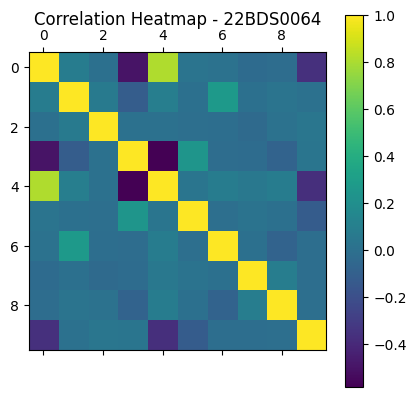

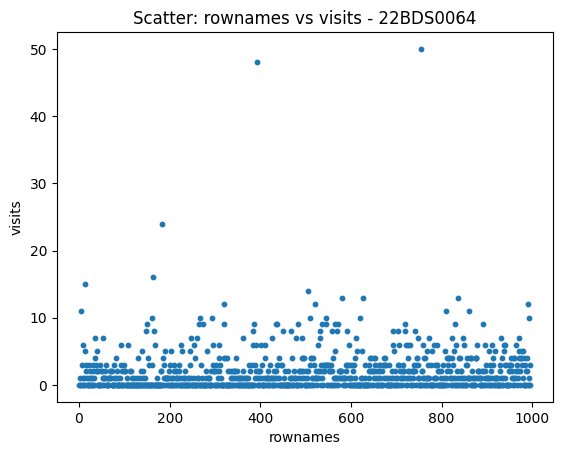


Group means by married:
           rownames    visits    exposure  children        age    income  \
married                                                                    
no       472.962821  1.971795  103.973077  1.317949  53.444872  7.802364   
yes      590.717593  1.782407  104.375000  1.300926  61.564815  9.595801   

          health1   health2    access    school  
married                                          
no      -0.010054  0.026465  0.399910  9.594872  
yes      0.036245 -0.095477  0.391574  6.986111  

Group means by gender:
          rownames    visits    exposure  children        age    income  \
gender                                                                    
female  461.115065  1.901542  103.978648  1.427046  51.884935  8.075953   
male    704.483660  2.091503  104.509804  0.692810  73.503268  8.826856   

         health1   health2    access    school  
gender                                          
female  0.012165 -0.003986  0.396560  9.406880 

In [28]:
# Correlation (numerical vs numerical)
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    print("Correlation matrix:\n", corr.round(3))
    plt.matshow(corr)
    plt.colorbar()
    plt.title("Correlation Heatmap - 22BDS0064", pad=20)
    plt.show()

# Scatter plot (first 2 numeric cols)
if len(numeric_cols) >= 2:
    x, y = numeric_cols[0], numeric_cols[1]
    plt.scatter(df[x], df[y], s=10)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"Scatter: {x} vs {y} - 22BDS0064")
    plt.show()

# Numerical vs categorical (group means)
for c in cat_cols[:2]:
    print(f"\nGroup means by {c}:")
    print(df.groupby(c)[numeric_cols].mean().head(10))

# Categorical vs categorical (contingency table)
if len(cat_cols) >= 2:
    contingency = pd.crosstab(df[cat_cols[0]], df[cat_cols[1]])
    print(f"\nContingency Table ({cat_cols[0]} x {cat_cols[1]}):\n")
    print(contingency.head(10))


/tmp/ipython-input-13218701.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=[str(k) for k in top_cats])


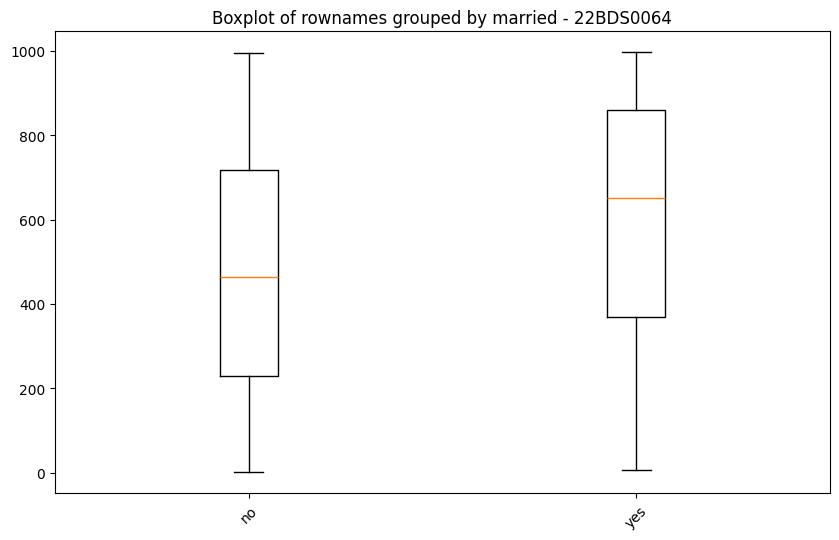

In [29]:
# Boxplot of numeric variable grouped by categories
if cat_cols and numeric_cols:
    num = numeric_cols[0]
    cat = cat_cols[0]
    top_cats = df[cat].value_counts().head(8).index
    data_to_plot = [df[df[cat]==k][num].dropna() for k in top_cats]
    plt.figure(figsize=(10,6))
    plt.boxplot(data_to_plot, labels=[str(k) for k in top_cats])
    plt.xticks(rotation=45)
    plt.title(f"Boxplot of {num} grouped by {cat} - 22BDS0064")
    plt.show()


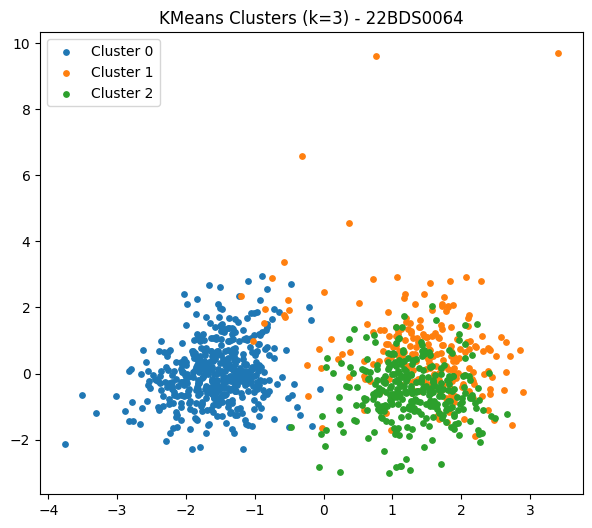

   rownames  visits  exposure  children  age  income  health1  health2  \
0         1       0       100         1   24  14.500    0.495   -0.854   
1         2       1        90         3   19   6.000    0.520   -0.969   
2         3       0       106         4   17   8.377   -1.227    0.317   
3         4       0       114         2   29   6.000   -1.524    0.457   
4         5      11       115         1   26   8.500    0.173   -0.599   

   access married  gender ethnicity  school enroll program  cluster_label  
0    0.50      no  female      cauc      13    yes    afdc            0.0  
1    0.17      no  female      cauc      11    yes    afdc            0.0  
2    0.42      no  female      cauc      12    yes    afdc            0.0  
3    0.33      no  female      cauc      12    yes    afdc            0.0  
4    0.67      no  female      cauc      16    yes    afdc            0.0  


In [30]:
# KMeans clustering with PCA visualization
if len(numeric_cols) >= 2:
    X = df[numeric_cols].dropna()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    plt.figure(figsize=(7,6))
    for cl in np.unique(labels):
        subset = X_pca[labels==cl]
        plt.scatter(subset[:,0], subset[:,1], s=15, label=f"Cluster {cl}")
    plt.legend()
    plt.title("KMeans Clusters (k=3) - 22BDS0064")
    plt.show()

    # Save labels into dataset
    df.loc[X.index, "cluster_label"] = labels
    print(df.head())
